# Communicating with QuPath

This notebook will show how to exchange information between QuPath and Python.

The [**QuPath Py4J Extension**](https://github.com/qupath/qupath-extension-py4j) is a QuPath extension that helps bring the QuPath and QuBaLab worlds much closer together, thanks to [Py4J](https://www.py4j.org). To begin, you'll need to open QuPath and make sure that this extension is installed. Installation basically involves dragging a jar file onto QuPath's main viewer, and then allowing QuPath to copy the jar to its extensions folder.

If that works, you should see a new Python icon in QuPath's toolbar, and also a command *Extensions &rarr; Py4J &rarr; Start Py4J Gateway*.

Both the toolbar button and menu command do the same thing - so click on either to open a *gateway* from QuPath to Python. You can use the default port and define a token if you want.

> For more info, see the [Py4J documentation](https://www.py4j.org)
> For more details about Py4J and security, see [this FAQ page](https://www.py4j.org/faq.html#are-there-any-security-concerns-with-py4j).

## Creating the gateway

The following code will create a gateway from Python. It assumes that QuPath is launched and a gateway is started from here.

If no error is thrown, it means the connection is established.

In [1]:
from qubalab.qupath import qupath_gateway

token = None   # change the value of this variable if you provided a token while creating the QuPath gateway
port = 25333   # change the value of this variable if you provided a different port while creating the QuPath gateway
gateway = qupath_gateway.create_gateway(auth_token=token, port=port)

print("Gateway created")

Gateway created


## Communicating with the entry point

You can communicate with QuPath through `gateway.entry_point`.

This object represents the `QuPathEntryPoint` Java class. If you look at the [source code of this class](https://github.com/qupath/qupath-extension-py4j/blob/main/src/main/java/qupath/ext/py4j/core/QuPathEntryPoint.java), you'll see that it has a few public functions. Let's try the `getExtensionVersion()` function:

In [13]:
print(f"Extension version: {gateway.entry_point.getExtensionVersion()}")

Extension version: 0.0.1-SNAPSHOT


The `QuPathEntryPoint` class extends the `qupath.lib.gui.scripting.QPEx` class, which extends the `qupath.lib.scripting.QP` class. This means that all functions of the `QPEx` and `QP` classes are also available through the entry point.

The availables functions are listed:
* [Here](https://qupath.github.io/javadoc/docs/qupath/lib/gui/scripting/QPEx.html) for the `QPEx` class.
* [Here](https://qupath.github.io/javadoc/docs/qupath/lib/scripting/QP.html) for the `QP` class.

Let try the `QP.getCurrentImageName()` function:

In [12]:
print(f"Current image name: {gateway.entry_point.getCurrentImageName()}")

Current image name: New image


When a function of the entry point returns a custom object, a Python `JavaObject` is returned. This object contains all fields and functions of the corresponding Java object. For example:

In [14]:
qupath_GUI = gateway.entry_point.getQuPath()  # qupath_GUI represents a QuPathGUI Java object

print(f"Type of qupath_GUI: {type(qupath_GUI)}")    # qupath_GUI is a JavaObject 

# The documentation of a QuPathGUI Java object can be found here:
# https://qupath.github.io/javadoc/docs/qupath/lib/gui/QuPathGUI.html
# For example, we can call the imageData property and the getVersion() function:
print(f"Image data: {qupath_GUI.imageData}")
print(f"Version: {qupath_GUI.getVersion()}")

Type of qupath_GUI: <class 'py4j.java_gateway.JavaObject'>
Image data: <py4j.java_gateway.JavaMember object at 0x112cd2c60>
Version: 0.6.0-SNAPSHOT


## Communicating with `qupath_gateway`

The `qubalab.qupath.qupath_gateway` also provides a set of functions that are easier to use than the entry point. For example, let's show a screenshot of the current QuPath interface:

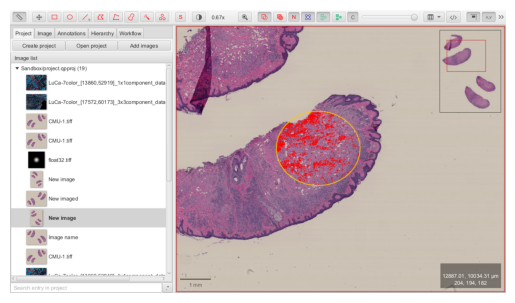

In [4]:
import matplotlib.pyplot as plt

plt.imshow(qupath_gateway.create_snapshot())
plt.axis(False)
plt.show()

**In general:**

- Try to use one of the functions of `qubalab.qupath.qupath_gateway`.
- If no function exists for your use case, use `gateway.entry_point`.

## Accessing an `ImageServer`

This section will show how to access the metadata and pixel values in Python of an image opened in QuPath. It assumes that an image is currently opened in QuPath.

You can access the QuPath image with the `QuPathServer` qubalab class. This class is an implementation of the qubalab `ImageServer` which is described in the *opening_images.ipynb* notebook, so it is recommended that you go through this notebook first.

In [5]:
from qubalab.images.qupath_server import QuPathServer

server = QuPathServer(gateway)

`server` is an `ImageServer`, so all functions described in *opening_images.ipynb* are also available here:

In [6]:
# Access image metadata

metadata = server.metadata

print(f'Image path: {metadata.path}')
print(f'Image name: {metadata.name}')
print()

print('Levels:')
for level, shape in enumerate(metadata.shapes):
    print(f'Shape of level {level}: {shape}')
print()

print('Pixel calibration:')
print(f'Pixel length on x-axis: {metadata.pixel_calibration.length_x}')
print(f'Pixel length on y-axis: {metadata.pixel_calibration.length_y}')
print()

print(f'Pixel type: {metadata.dtype}')
print()

print(f'Downsamples: {metadata.downsamples}')
print()

print('Channels:')
for channel in metadata.channels:
    print(channel)

Image path: /Users/lleplat/QuPath/Images/CMU-1.tiff
Image name: New image

Levels:
Shape of level 0: ImageShape(x=38144, y=51200, t=1, c=3, z=1)
Shape of level 1: ImageShape(x=19072, y=25600, t=1, c=3, z=1)
Shape of level 2: ImageShape(x=9536, y=12800, t=1, c=3, z=1)
Shape of level 3: ImageShape(x=4768, y=6400, t=1, c=3, z=1)
Shape of level 4: ImageShape(x=2384, y=3200, t=1, c=3, z=1)
Shape of level 5: ImageShape(x=1192, y=1600, t=1, c=3, z=1)
Shape of level 6: ImageShape(x=596, y=800, t=1, c=3, z=1)
Shape of level 7: ImageShape(x=298, y=400, t=1, c=3, z=1)
Shape of level 8: ImageShape(x=149, y=200, t=1, c=3, z=1)

Pixel calibration:
Pixel length on x-axis: PixelLength(length=0.4550625711035267, unit='micrometer')
Pixel length on y-axis: PixelLength(length=0.45641259698767683, unit='micrometer')

Pixel type: uint8

Downsamples: (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)

Channels:
ImageChannel(name='Red', color=(1.0, 0.0, 0.0))
ImageChannel(name='Green', color=(0.0, 1.0, 0.0)

Image shape: (3, 200, 149)


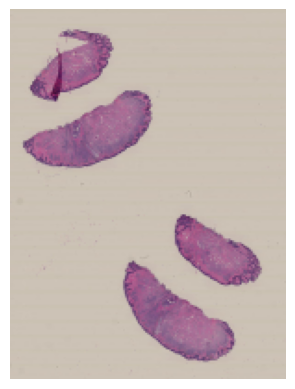

In [7]:
# Read and show lowest resolution image with read_region

highest_downsample = server.metadata.downsamples[-1]
lowest_resolution = server.read_region(highest_downsample)

print(f'Image shape: {lowest_resolution.shape}')

# This calls a utility function from qubalab to plot the image
from qubalab.display.plot import plotImage
plotImage(lowest_resolution)        

Image shape: (3, 200, 149)


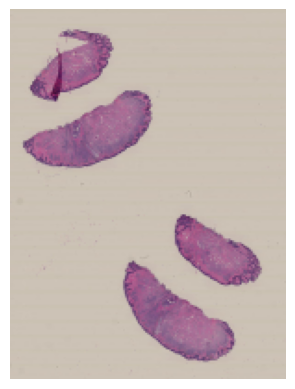

In [8]:
# Read and show lowest resolution image with level_to_dask

last_level = server.metadata.n_resolutions - 1
lowest_resolution = server.level_to_dask(last_level)

# Pixel values are not read yet, but you can get the shape of the image
print(f'Image shape: {lowest_resolution.shape}')

# Compute array. This will read the pixel values
lowest_resolution = lowest_resolution.compute()

plotImage(lowest_resolution)